In [1]:
# @title
# PROJETO AURA.AI
from IPython.display import display, HTML

# Define o texto a ser exibido
texto = "Projeto desenvolvido por: Onédio Siqueira Seabra Junior | Linkedin : https://www.linkedin.com/in/onediojunior/ | GitHub: https://github.com/onediojunior/desafio_machines"

# Define o estilo do texto
style = "<style>div { width: 100%; overflow: auto; white-space: nowrap; font-size : 22px; color: #000 }</style>"

# Cria uma tag HTML div com o comando marquee e o texto
html_msg = "<div><marquee>{}</marquee></div>".format(texto)

# O caminho para a imagem
imagem = 'https://i.postimg.cc/Qdxdt3tP/banner-animalyspotter-ai.png'
# O código HTML para exibir a imagem em tamanho original e centralizada
html = f'<img src="{imagem}" style="display: block; margin: 0 auto; width: 100%; height: 100%; object-fit: contain">'

# Exibe a imagem usando o display do IPython e o HTML
display(HTML(html))
# Exibe o texto com largura 100% e rolagem
display(HTML(style + html_msg + "<br/>"))

<h2><b>I - METODOLOGIA EMPREGADA</b></h2>
<hr/>
<h4 align="justify">
Para o presente projeto foi utilizado a metodologia CRISP-DM para seu desenvolvimento que pode ser representada, conforme figura abaixo.
</h4><br/>
<center><img src='https://i.postimg.cc/FKxs3MLQ/crisp-dm-texto-preto.png'></center><br/>

<h2><b>II - CRISP-DM : ENTENDIMENTO DO NEGÓCIO</b></h2>
<hr/>
<h4 align="justify">
<b>Definição dos Objetivos</b>:<br/>
A organização opera com várias máquinas, cada uma equipada com sensores que fornecem leituras indicativas de seu desempenho e estado. O objetivo principal é garantir que todas as máquinas estejam operando de maneira otimizada e eficiente. Para isso, é crucial identificar rapidamente qualquer máquina que possa estar apresentando problemas, com base nas leituras dos sensores, para evitar falhas, minimizar o tempo de inatividade e garantir a qualidade da produção.<br/><br/></h4>

<h4 align="justify">
<b>Avaliação da Situação</b>:
Atualmente, a organização possui um conjunto de dados contendo leituras de sensores de 17 máquinas. Cada máquina tem oito sensores diferentes, fornecendo leituras que podem ser indicativas de seu estado e desempenho. No entanto, interpretar manualmente essas leituras para cada máquina é demorado e sujeito a erros.<br/><br/></h4>

<h4 align="justify">
<b>Determinação dos Objetivos de Mineração de Dados</b>:
O objetivo técnico é desenvolver um modelo ou algoritmo que possa analisar automaticamente as leituras dos sensores e identificar quais máquinas, se houver, estão mostrando sinais de problemas ou falhas iminentes. Esse modelo deve ser preciso e robusto, capaz de detectar anomalias ou padrões preocupantes nas leituras dos sensores.<br/><br/></h4>

<h4 align="justify">
<b>Criação de um Plano de Projeto:</b><br/>
1. Coleta e Preparação de Dados: Começaremos coletando e preparando os dados das leituras dos sensores para análise.
Exploração de Dados: Uma análise exploratória dos dados ajudará a entender a distribuição das leituras e identificar quaisquer padrões ou anomalias óbvias.<br/>
2. Modelagem: Vários algoritmos, como Isolation Forest, PCA e DBSCAN, serão testados para identificar as máquinas com leituras anômalas.<br/>
3. Avaliação: O desempenho de cada modelo será avaliado com base em sua capacidade de identificar corretamente máquinas problemáticas.<br/>
4. Implementação: Uma vez que um modelo adequado seja identificado, ele será implementado como uma ferramenta ou aplicativo que pode ser usado regularmente para monitorar as máquinas.
</h4>

<h2><b>III - CRISP-DM : ENTENDIMENTOS DOS DADOS</b></h2>
<hr/>
<h4 align="justify">
Os dados dos usuários sserão trazidos de forma textual para uma variável chamada <b><i>data</i></b> que posteriormente será carregada em um datafme (df). Cabe destacar que, a variável <b><i>seq</i></b> identifica as máquinas que estão sendo avaliadas e as variáveis <b><i>V1 a V8</i></b> apresentam os valores medidos pelos sensores.
</h4>

<h4 align="justify">
Com base nos dados fornecidos, abaixo seguem algumas análises e testes que serão realizados:<br/>

&#8857; <b>Estatísticas Descritivas</b>: Para entender a distribuição e a centralidade dos dados.<br/>
&#8857; <b>Visualizaçõe</b>s: Histogramas, boxplots e scatter plots para visualizar a distribuição e relações entre as variáveis.<br/>
&#8857; <b>Verificar Valores Ausentes</b>: Identificar se há valores ausentes nos dados.<br/>
&#8857; <b>Identificar Outliers</b>: Usando técnicas estatísticas ou visualizações.<br/>
&#8857; <b>Correlação entre Variáveis</b>: Para entender se há alguma relação linear entre as variáveis.</b>
</h4>

<h3><b>&#9776; Carregando os dados</b></h3>

In [2]:
# Importando bibliotecas necessárias
import pandas as pd

# Carregando os dados
data = """
Seq;V1;V2;V3;V4;V5;V6;V7;V8
1;375;135;458;475;509;336;469;492
2;57;47;53;73;63;62;63;58
3;245;267;242;227;271;219;268;286
4;1472;1494;1462;1582;1613;1323;1490;1493
5;105;66;103;103;118;98;101;118
6;54;41;62;64;55;59;63;59
7;193;209;184;235;207;172;223;156
8;147;93;122;160;139;130;152;101
9;1102;674;957;1137;1058;990;1098;878
10;720;1033;566;874;628;646;706;320
11;253;143;171;265;193;226;247;99
12;685;586;750;803;830;615;699;777
13;488;355;418;570;465;437;467;313
14;198;187;220;203;247;176;209;204
15;360;334;337;365;376;322;363;348
16;1374;1506;1572;1256;1734;1235;1597;1684
17;156;139;147;175;167;138;164;170
"""

# Convertendo a string em um DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data), sep=";")

<h3><b>&#9776; Carregando uma Amostra Aleatória</b></h3>

In [3]:
df.sample(5)

,Seq,V1,V2,V3,V4,V5,V6,V7,V8
11,12,685,586,750,803,830,615,699,777
5,6,54,41,62,64,55,59,63,59
12,13,488,355,418,570,465,437,467,313
3,4,1472,1494,1462,1582,1613,1323,1490,1493
14,15,360,334,337,365,376,322,363,348


<h3><b>&#9776; Verificar valores ausentes</b></h3>

In [4]:
print("\nValores Ausentes por Variável:")
print(df.isnull().sum())


Valores Ausentes por Variável:
Seq    0
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
dtype: int64


<h3><b>&#9776; Estatística Descritiva</b></h3>

In [5]:
#Estatísticas Descritivas
df.describe()

,Seq,V1,V2,V3,V4,V5,V6,V7,V8
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,9.000000,469.647059,429.941176,460.235294,503.941176,510.176471,422.588235,492.882353,444.470588
std,5.049752,452.701466,479.896014,469.595907,463.859282,517.552562,405.843267,480.721448,491.302748
min,1.000000,54.000000,41.000000,53.000000,64.000000,55.000000,59.000000,63.000000,58.000000
25%,5.000000,156.000000,135.000000,147.000000,175.000000,167.000000,138.000000,164.000000,118.000000
50%,9.000000,253.000000,209.000000,242.000000,265.000000,271.000000,226.000000,268.000000,286.000000
75%,13.000000,685.000000,586.000000,566.000000,803.000000,628.000000,615.000000,699.000000,492.000000
max,17.000000,1472.000000,1506.000000,1572.000000,1582.000000,1734.000000,1323.000000,1597.000000,1684.000000


<h3><b>&#9776; Máquinas que apresentam Máximo e Mínimo valores nos sensores</b></h3>

In [6]:
# Identificando máquinas com valores máximos
max_machines = df.drop('Seq', axis=1).idxmax()
max_seq = df.loc[max_machines, 'Seq'].values

# Identificando máquinas com valores mínimos
min_machines = df.drop('Seq', axis=1).idxmin()
min_seq = df.loc[min_machines, 'Seq'].values

# Exibindo os resultados
print("Máquinas com valores máximos para cada sensor:")
for column, seq in zip(df.columns[1:], max_seq):
    print(f"{column}: Máquina {seq}")

print("\nMáquinas com valores mínimos para cada sensor:")
for column, seq in zip(df.columns[1:], min_seq):
    print(f"{column}: Máquina {seq}")

Máquinas com valores máximos para cada sensor:
V1: Máquina 4
V2: Máquina 16
V3: Máquina 16
V4: Máquina 4
V5: Máquina 16
V6: Máquina 4
V7: Máquina 16
V8: Máquina 16

Máquinas com valores mínimos para cada sensor:
V1: Máquina 6
V2: Máquina 6
V3: Máquina 2
V4: Máquina 6
V5: Máquina 6
V6: Máquina 6
V7: Máquina 2
V8: Máquina 2


<h3><b>&#9776; Histograma</b></h3>

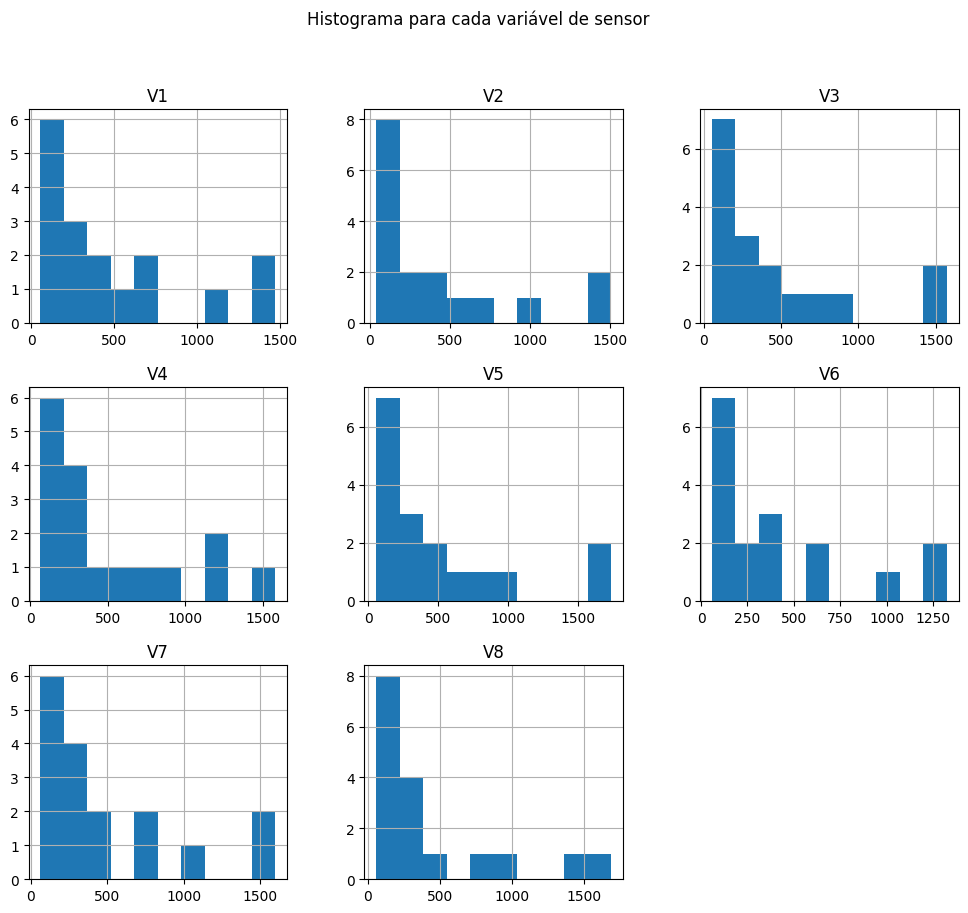

In [7]:
# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt

df.drop('Seq', axis=1).hist(figsize=(12, 10))
plt.suptitle("Histograma para cada variável de sensor")
plt.show()

<h3><b>&#9776; Boxplots</b></h3>

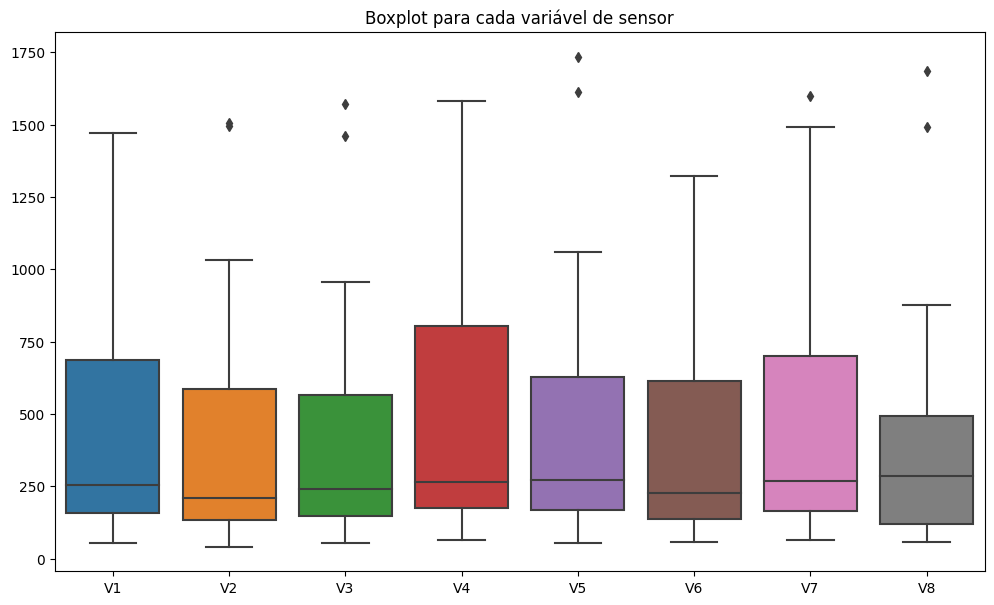

In [8]:
# Importando bibliotecas necessárias
import seaborn as sns

# Boxplots
plt.figure(figsize=(12, 7))
sns.boxplot(data=df.drop('Seq', axis=1))
plt.title("Boxplot para cada variável de sensor")
plt.show()

<h3><b>&#9776; Identificar Outliers</b></h3>

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("\nOutliers:")
print(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())



Outliers:
Seq    0
V1     0
V2     2
V3     2
V4     0
V5     2
V6     0
V7     1
V8     2
dtype: int64


<h3><b>&#9776; Correlação entre Variáveis</b></h3>

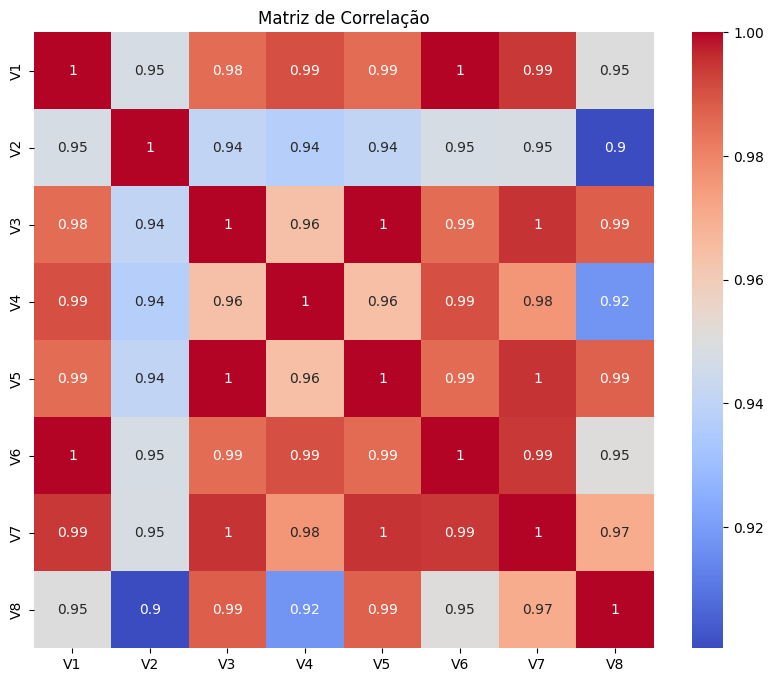

In [10]:
correlation_matrix = df.drop('Seq', axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

<h2><b>IV - CRISP-DM : PREPARAÇÃO DOS DADOS</b></h2>
<hr/>
<h4 align="justify">Com base nos dados fornecidos anteriormente, iremos realizar a transformação dos dados realizando a normalização dos mesmos e a divisão de dados</h4>

<h3><b>&#9776; Divisão dos dados</b></h3>

In [11]:
# Separando as variáveis
X = df.drop('Seq', axis=1)

<h3><b>&#9776; Normalizar os dados</b></h3>

In [12]:
# Importando bibliotecas necessárias
from sklearn.preprocessing import StandardScaler

# Normalizando os dados
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

<h2><b>V - CRISP-DM : GERAR MODELO(S)</b></h2>
<hr/>
<h4 align="justify">
Após uma cuidadosa preparação e entendimento dos dados, estamos prontos para entrar na fase de modelagem. Nesta etapa, aplicaremos técnicas de aprendizado de máquina e estatísticas para identificar máquinas que possam estar apresentando problemas com base nas leituras dos sensores.<br/>

<b>Seleção de Técnicas</b>:<br/>
Dada a natureza do problema, que é identificar anomalias ou outliers, optamos por explorar vários algoritmos, incluindo Isolation Forest, PCA combinado com a distância de Mahalanobis e DBSCAN. Cada um desses algoritmos tem suas próprias vantagens e é adequado para detectar padrões anômalos em diferentes cenários.<br/>

<b>Construção do Modelo:</b><br/>
Para cada técnica selecionada, construímos um modelo usando o conjunto de treinamento. Durante este processo, ajustamos os parâmetros de cada algoritmo para otimizar sua capacidade de identificar máquinas problemáticas com precisão.<br/>

<b>Avaliação</b>:<br/>
Uma vez construídos, os modelos foram avaliados com base em sua capacidade de detectar corretamente anomalias no conjunto de teste. Esta avaliação nos ajudará a determinar qual modelo é o mais adequado para o problema em questão.<br/>

<b>Iteração</b>:<br/>
A modelagem é um processo iterativo. Com base nos resultados da avaliação, podemos voltar e ajustar os parâmetros, tentar novas técnicas ou até mesmo voltar à fase de preparação dos dados para fazer ajustes adicionais, se necessário.

<h3><b>&#9776; MODELO POR DETECÇÃO DE OUTLIERS USANDO ISOLATION FOREST</b></h3>
<h4 align="justify">
A identificação de outliers refere-se ao processo de reconhecimento de pontos de dados que apresentam um desvio notável em relação ao conjunto geral de dados. No contexto apresentado, se uma máquina exibe leituras de sensores significativamente distintas das outras, ela pode estar apresentando falhas ou irregularidades.</h4>
<h4 align="justify">
Para realizar essa tarefa, empregamos o método [Isolation Forest]. Esse algoritmo, fundamentado em estruturas de árvores, trabalha isolando as observações, diferenciando-as do restante do conjunto.
</h4>

In [13]:
# Importando bibliotecas necessárias
from sklearn.ensemble import IsolationForest

# Detecção de Outliers usando Isolation Forest
clf = IsolationForest(contamination=0.2)
outliers = clf.fit_predict(X_normalized)

# Identificando máquinas com problemas
df['Outlier'] = outliers
problem_machines_forest = df[df['Outlier'] == -1]['Seq'].tolist()

print(f"Máquinas com problemas: {problem_machines_forest}")


Máquinas com problemas: [4, 9, 10, 16]


<h3><b>&#9776; MODELO USANDO PCA SEGUIDO DE DETECÇÃO DE DISTÂNCIAS ANÔMALAS</b></h3>
<h4 align="justify">
O PCA (Análise de Componentes Principais) é uma técnica utilizada para simplificar a complexidade dos dados, reduzindo suas dimensões.</h4>
<h4 align="justify">
Depois de aplicar o PCA e condensar as dimensões dos dados, o próximo passo é determinar a distância de Mahalanobis para cada ponto no novo espaço simplificado. Pontos que apresentam distâncias excepcionalmente elevadas são categorizados como atípicos ou anômalos.
</h4>

In [14]:
# Importando bibliotecas necessárias
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial import distance

# Aplicando PCA
pca = PCA(n_components=2)  # Reduzindo para 2 componentes
X_pca = pca.fit_transform(X_normalized)

# Calculando a distância de Mahalanobis
cov_matrix = np.cov(X_pca, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_distr = np.mean(X_pca, axis=0)
anomaly_score = []
for i in range(X_pca.shape[0]):
    anomaly_score.append(distance.mahalanobis(X_pca[i], mean_distr, inv_cov_matrix))

# Definindo um limite para considerar uma observação como anômala
threshold = np.percentile(anomaly_score, 95)  # 95% percentil
outliers = [score > threshold for score in anomaly_score]

# Identificando máquinas com problemas
df['Outlier'] = outliers
problem_machines_pca = df[df['Outlier']]['Seq'].tolist()

print(f"Máquinas com problemas: {problem_machines_pca}")


Máquinas com problemas: [10]


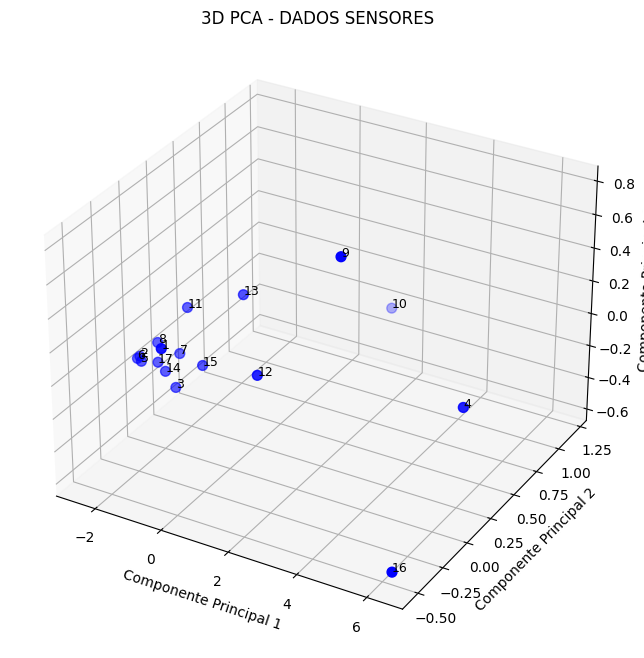

In [15]:
# Importando bibliotecas necessárias
import matplotlib.pyplot as plt

# Aplicando PCA para 3 componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_normalized)

# Plotando os dados no espaço tridimensional
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

#plotando os pontos
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c='b', marker='o', s=50)

# Adicionando a numeração das máquinas
for i, seq in enumerate(df['Seq']):
    ax.text(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], str(seq), fontsize=9)


ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('3D PCA - DADOS SENSORES')

plt.show()


<h3><b>&#9776; MODELO USANDO DBSCAN</b></h3>
<h4 align="justify">
O DBSCAN é uma técnica de agrupamento que identifica grupos com diferentes densidades e é capaz de reconhecer pontos considerados como ruído ou anômalos.</h4>
<h4 align="justify">
A lógica central do DBSCAN é que um ponto anômalo é aquele que não pertence a um grupo denso de dados. Assim, o algoritmo agrupa pontos que estão próximos entre si, enquanto pontos isolados em áreas menos densas são classificados como anomalias.
</h4>

In [16]:
# Importando bibliotecas necessárias
from sklearn.cluster import DBSCAN

# Aplicando DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=3)
clusters = dbscan.fit_predict(X_normalized)

# Identificando máquinas com problemas
# No DBSCAN, pontos marcados com -1 são considerados anomalias ou ruído
df['Anomaly'] = clusters == -1
problem_machines_dbscan = df[df['Anomaly']]['Seq'].tolist()

print(f"Máquinas com problemas: {problem_machines_dbscan}")


Máquinas com problemas: [4, 9, 10, 12, 16]


<h2><b>VI - CRISP-DM : AVALIAÇÃO</b></h2>
<hr/>
<h4 align="justify">Para consolidar os insights de todos os três modelos e apresentar um resultado único, podemos adotar uma abordagem de "votação majoritária". Se os três modelos identificarem uma máquina com problemá, ela será classificada como tal. Isso pode ajudar a reduzir falsos positivos e aumentar a confiança nas detecções.</h4>

In [17]:
# Usando um conjunto para identificar máquinas comuns entre os modelos
final_problem_machines = set()

for machine in df['Seq']:
    count = 0
    if machine in problem_machines_forest:
        count += 1
    if machine in problem_machines_pca:
        count += 1
    if machine in problem_machines_dbscan:
        count += 1

    if count >= 3:
        final_problem_machines.add(machine)

print("Máquinas problemáticas identificadas pela abordagem de votação majoritária:", final_problem_machines)


Máquinas problemáticas identificadas pela abordagem de votação majoritária: {10}


<h2><b>VII - IMPLANTAÇÃO</b></h2>
<hr/>
<h4 align="justify">
Com os modelos devidamente avaliados e validados, avançamos para a fase final do nosso projeto: a implantação. Esta etapa é onde o valor real do projeto de ciência de dados é realizado, pois os insights e modelos desenvolvidos são traduzidos em aplicações práticas que podem ser usadas no dia a dia do negócio.<br/></h4>

<h4 align="justify">
<b>Aplicação Streamlit:</b><br/>
Decidimos usar o Streamlit, uma popular ferramenta de desenvolvimento de aplicativos de ciência de dados, para criar uma interface amigável e interativa. O Streamlit nos permite transformar nossos modelos e scripts de análise em uma aplicação web interativa sem a necessidade de um extenso desenvolvimento front-end.<br/></h4>

<h4 align="justify">
<b>Funcionalidades da Aplicação:</b><br/>
A aplicação permitirá aos usuários carregar novos conjuntos de dados de leituras de sensores e obter rapidamente insights sobre quais máquinas podem estar apresentando problemas. Além disso, os usuários podem explorar visualizações interativas, comparar os resultados de diferentes modelos e ajustar parâmetros para refinar as análises.</h4>

<h4 align="justify">
<b>Manutenção e Atualização:</b><br/>
Uma vez implantada, a aplicação não é o fim da jornada. É crucial monitorar regularmente o desempenho do modelo, garantindo que ele continue relevante e preciso à medida que novos dados são coletados. O Streamlit facilita a incorporação de atualizações e melhorias, permitindo uma evolução contínua da ferramenta.</h4><br/>